 # Proyecto Mecánica de Fluidos Grupo 13

Introdcción

En este proyecto se realizó un estudio de un flujo turbulento en una tuberia, para realizar las mediciones se utilizó un instrumento de mediciones por velocimetria de imagenes de particula y con esos datos se analizó la velocidades de las particulas en distintos tiempos y posiciones de la tuberia

In [1]:
import scipy.io as sio
import numpy as np
data = sio.loadmat('data.mat')
x = data['x']
y = data['y']
u = data['u']
v = data['v']


Diccionario con parámetros del agua en las condiciones del experimento (Fuente: Frank M. White Fluid Mechanics 7th Edition page 27 Table 1.4 "Viscosity and kinematic viscosity of eight fluids at 1 atm and 20°C")

In [4]:
agua = {"densidad": 998,  # kg/m3
        "viscocidad dinámica": 1 * (10 ** -3), # kg/(m * s)
        "viscocidad cinemática": 1.01 * (10 ** -6), # m2/s
        "diametro": 0.021} # m

Gráfico de los puntos del espacio

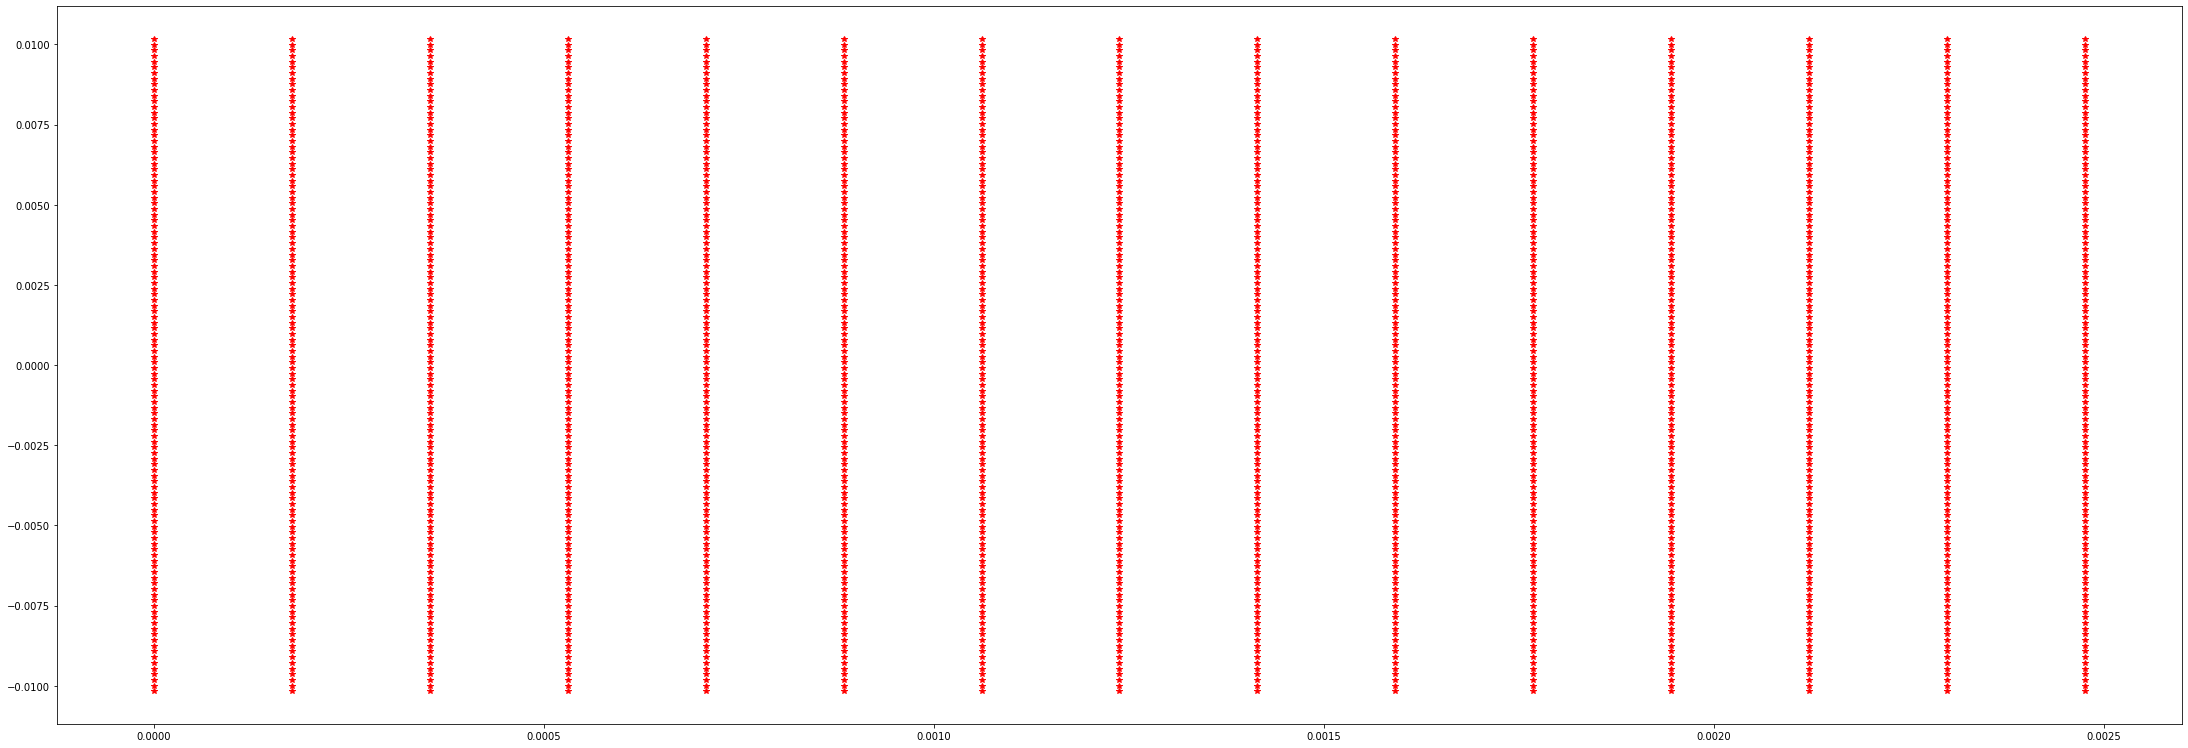

In [6]:
import matplotlib.pyplot as plt
# Vamos a graficar todos los puntos muestreados

plt.rcParams["figure.figsize"] = [30.50, 10.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(x,y,'r*')
plt.show()

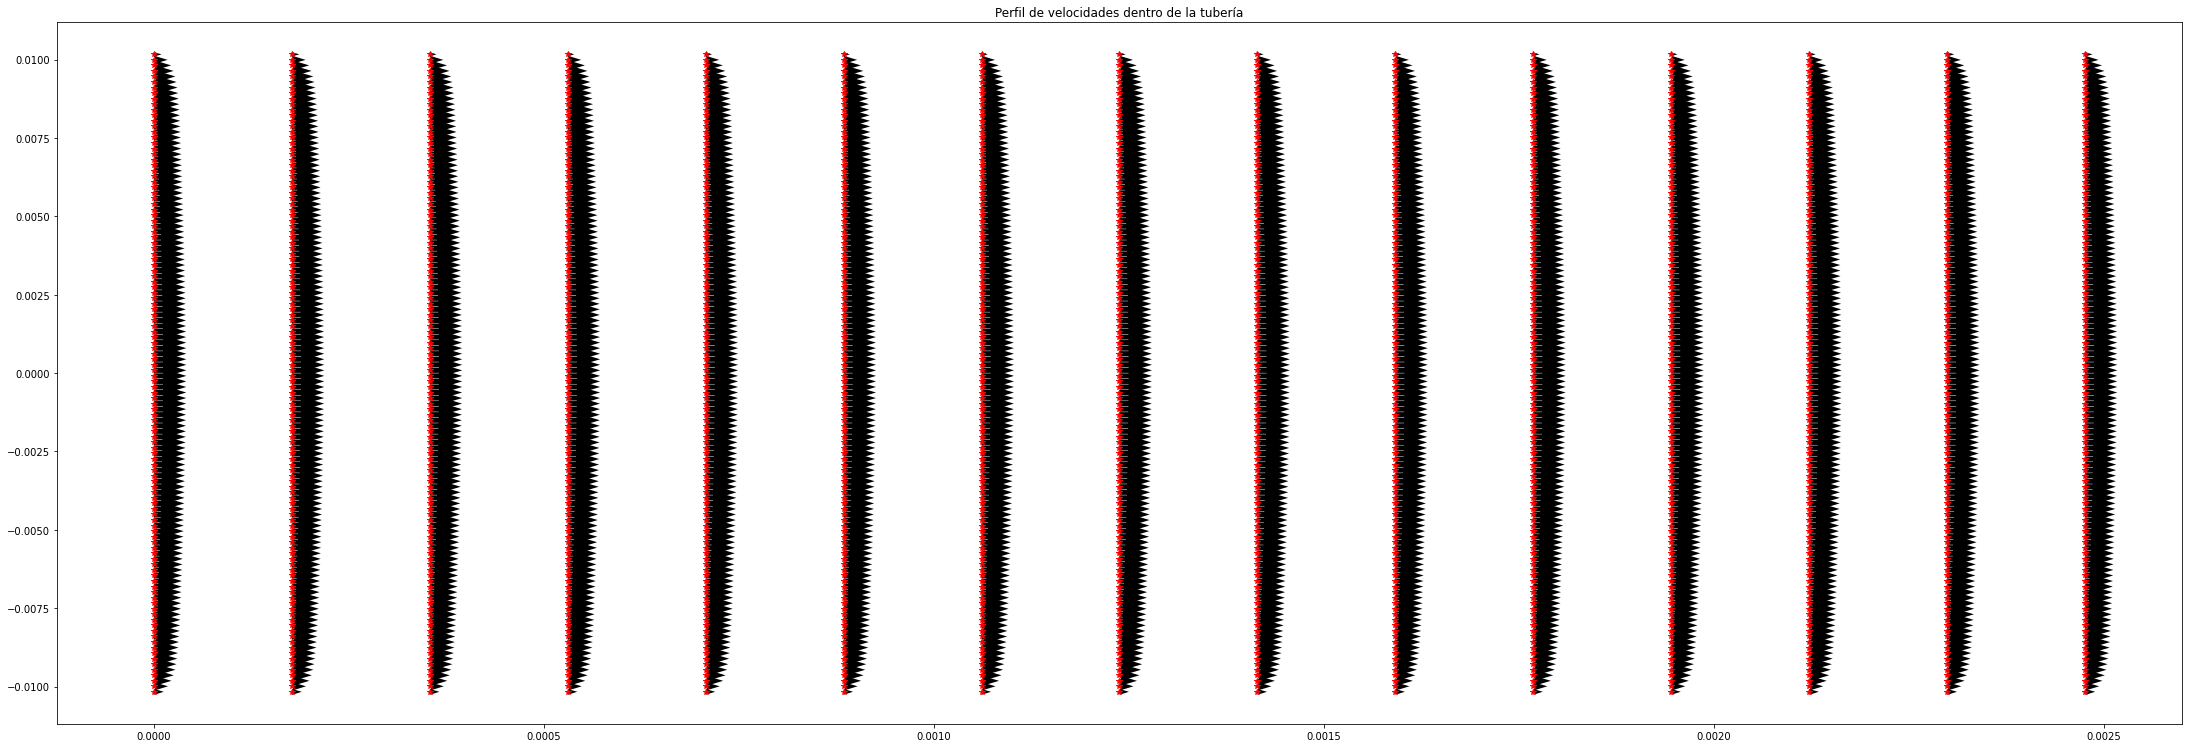

In [7]:
def perfil_velocidad(V_x, V_y):

    long_promedio = [] # Velocidades longitudinales promedio en cada punto
    vert_promedio = [] # Velocidades transversales promedio en cada punto
    for i in range(116):
        lista_1 = []
        lista_2 = []
        for j in range(15):
            lista_1.append(np.mean(np.array(V_x[i][j])))
            lista_2.append(np.mean(np.array(V_y[i][j])))

        long_promedio.append(lista_1)
        vert_promedio.append(lista_2)

    plt.quiver(x, y, long_promedio, vert_promedio) # Velocidad media de cada punto en el espacio
    plt.plot(x,y,'r*') # Puntos xy del espacio muestrado
    plt.title("Perfil de velocidades dentro de la tubería")
    plt.show()

perfil_velocidad(u,v)

1) Verificar presencia de vectores erróneos (Eliminación de outliers, buscar información en internet, está más relacionado con Machine Learning que con mecánica de fluidos)

Usaremos el método de rango intercuartílico para eliminar valores atípicos. Fuente: https://statologos.com/eliminar-valores-atipicos-en-python/
https://www.statology.org/interquartile-range-python/#:~:text=It%20is%20calculated%20as%20the,percentile()%20function.


Fuentes bibliográficas: https://towardsdev.com/outlier-detection-using-iqr-method-and-box-plot-in-python-82e1e15232bd
https://www.adictosaltrabajo.com/2019/11/28/deteccion-y-reemplazo-de-outliers-con-r/

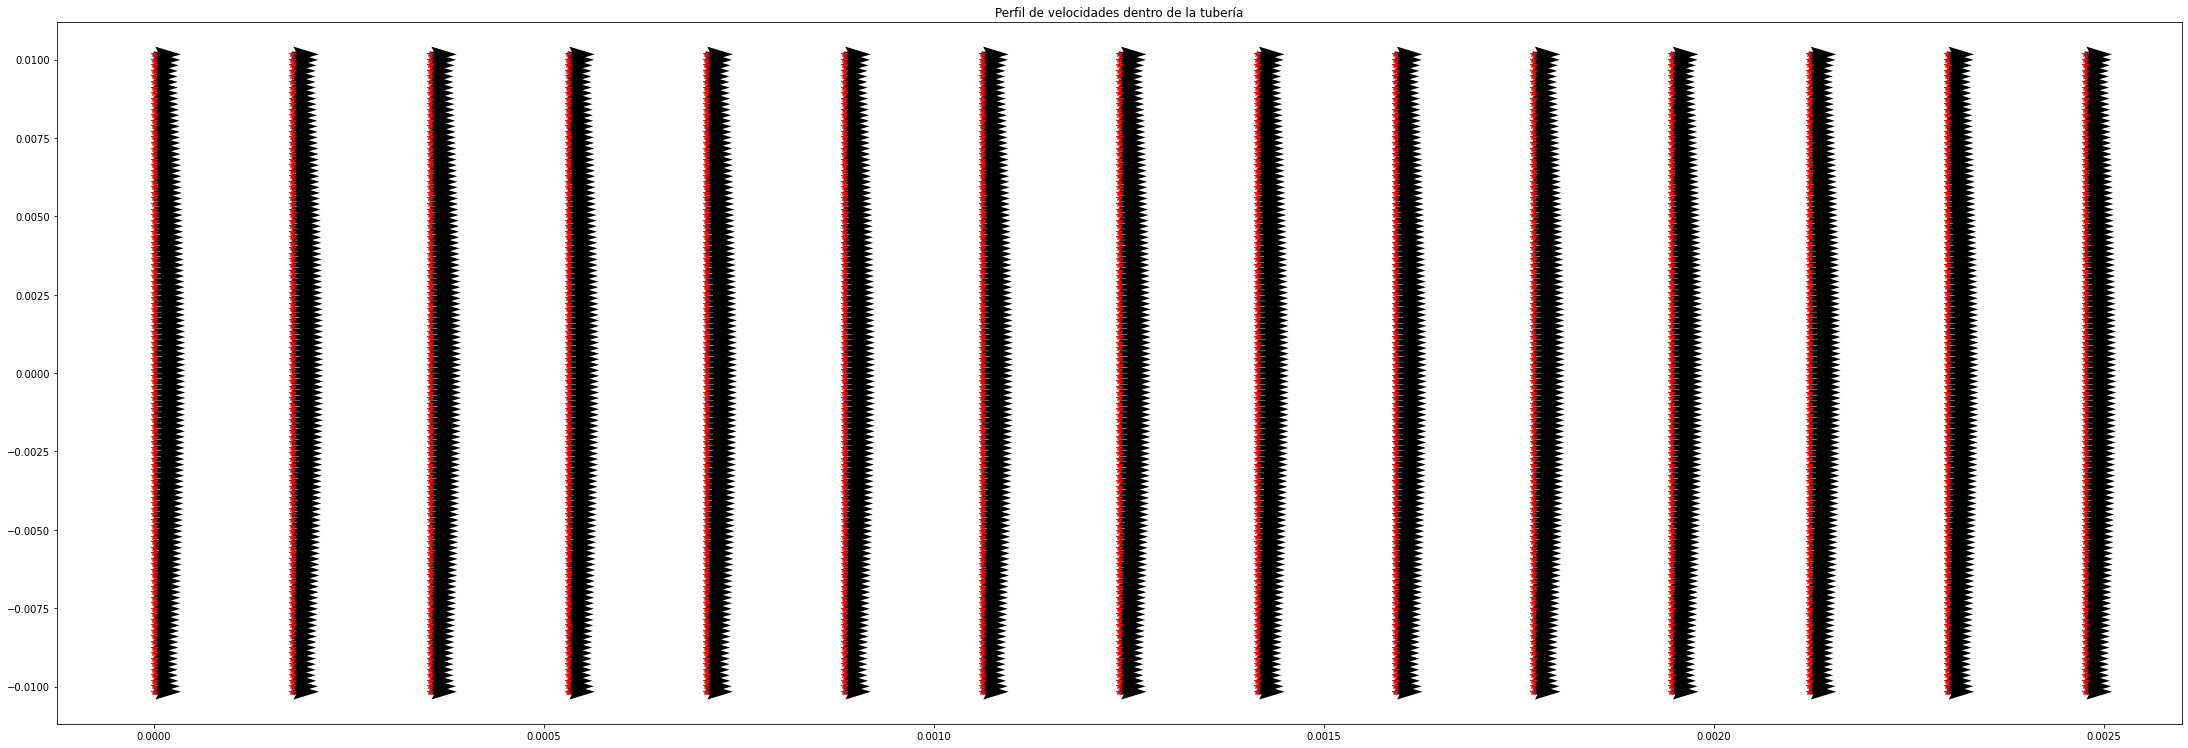

In [29]:
def eliminar_y_reemplazar(datos, reemplazo):
    # El reemplazo será el promedio de la lista sin eliminar outliers
    Q1 = np.quantile(datos, q=.25)
    Q3 = np.quantile(datos, q=.75)
    IQR = Q3 - Q1

    for i in range(116):
        for j in range(15):
            for k in range(39999):
                velocity = datos[i][j][k]
                if velocity > (Q3 + 1.5*IQR) or velocity < (Q1 - 1.5*IQR): # Condición de ser un outlier
                    datos[i][j][k] = reemplazo 
                
copia_u = u.copy()
copia_v = v.copy()

eliminar_y_reemplazar(copia_u, np.mean(copia_u))
eliminar_y_reemplazar(copia_v, np.mean(copia_v))

# Ahora vamos a graficar el perfil de velocidades con los outliers corregidos para ver si realmente conviene cambiarlos
perfil_velocidad(copia_u, copia_v)

Reemplazando los outliers por un valor medio se obtiene un perfil casi uniforme de velocidades. Esto sería un perfil de velocidad de un fluido ideal sin viscosidad, y por ende sin vorticidad ni ningún efecto turbulento. Para efectos del estudio de este informe, no será necesario reemplazar los valores de la velocidad

2a) Calcular velocidades longitudinales y transversales medias 

In [9]:
# Arrays de los datos
x_array = np.array(x)
y_array = np.array(y)
u_array = np.array(u)
v_array = np.array(v)

# Velocidad longitudinal promedio
u_promedio = np.mean(u_array) # Un valor característico de todo el flujo
print(f"La velocidad longitudinal promedio es {u_promedio} m/s") # Debiese darnos 0.279 m/s

# Velocidad transversal promedio
v_promedio = np.mean(v_array) # Un valor específico de todo el flujo
print(f"La velocidad transversal promedio es {v_promedio} m/s") 

mean_u_t = u_array.mean(axis=(0,1)) # Promedio de la velocidad longitudinal en cada tiempo (lista de len = 39999)
mean_v_t = v_array.mean(axis=(0,1)) # Promedio de la velocidad transversal en cada tiempo (lista de len = 39999)

mean_u_xy = u_array.mean(axis=2) # Promedio de la velocidad longitudinal en cada punto (lista de 116 x 15)
mean_v_xy = v_array.mean(axis=2) # Promedio de la velocidad transversal en cada punto (lista de 116 x 15)

# Aprovechamos también de hacer la descomposición de Reynolds para posteriormente graficar
u_prima = mean_u_t - u_promedio
v_prima = mean_v_t - v_promedio

vel = np.linalg.norm([mean_u_t, mean_v_t], axis=0)

La velocidad longitudinal promedio es 0.28399841705259005 m/s
La velocidad transversal promedio es -0.00023552504234347524 m/s


Valores obtenidos sin la eliminación de outliers:

$\bar{u} = 0.28399841705259005$ m/s

$\bar{v} = -0.00023552504234347524$ m/s

Ojo que al eliminar outliers el promedio se aleja del que debiésemos obtener

Gráficos de la velocidad

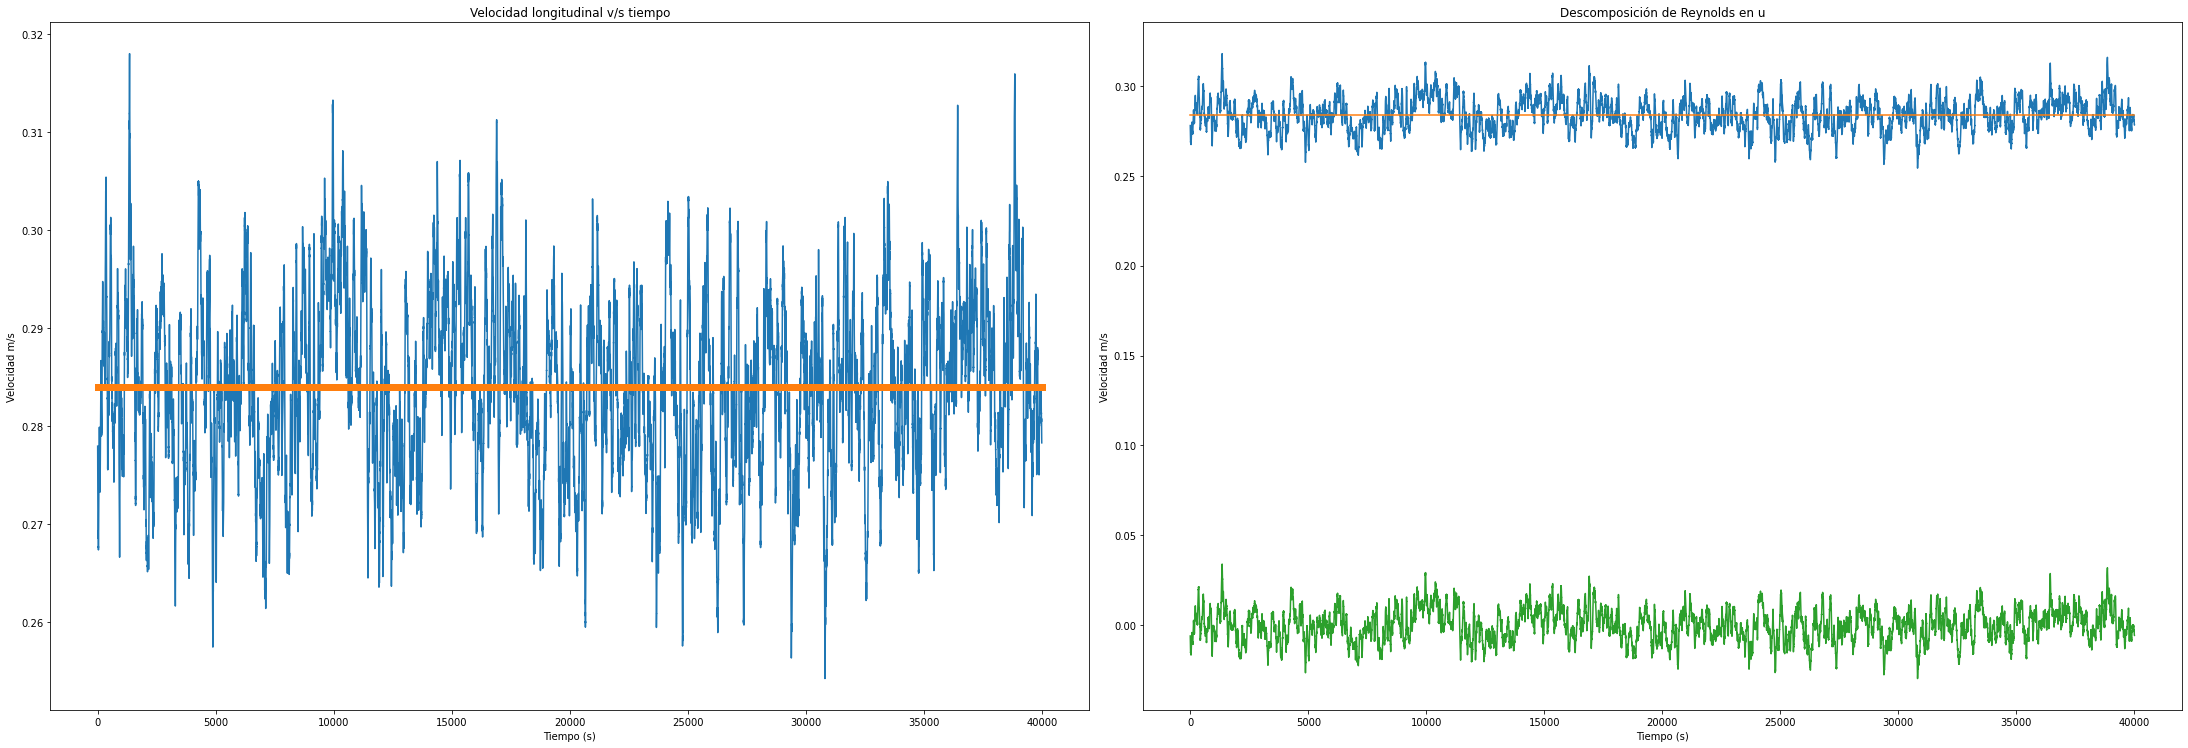

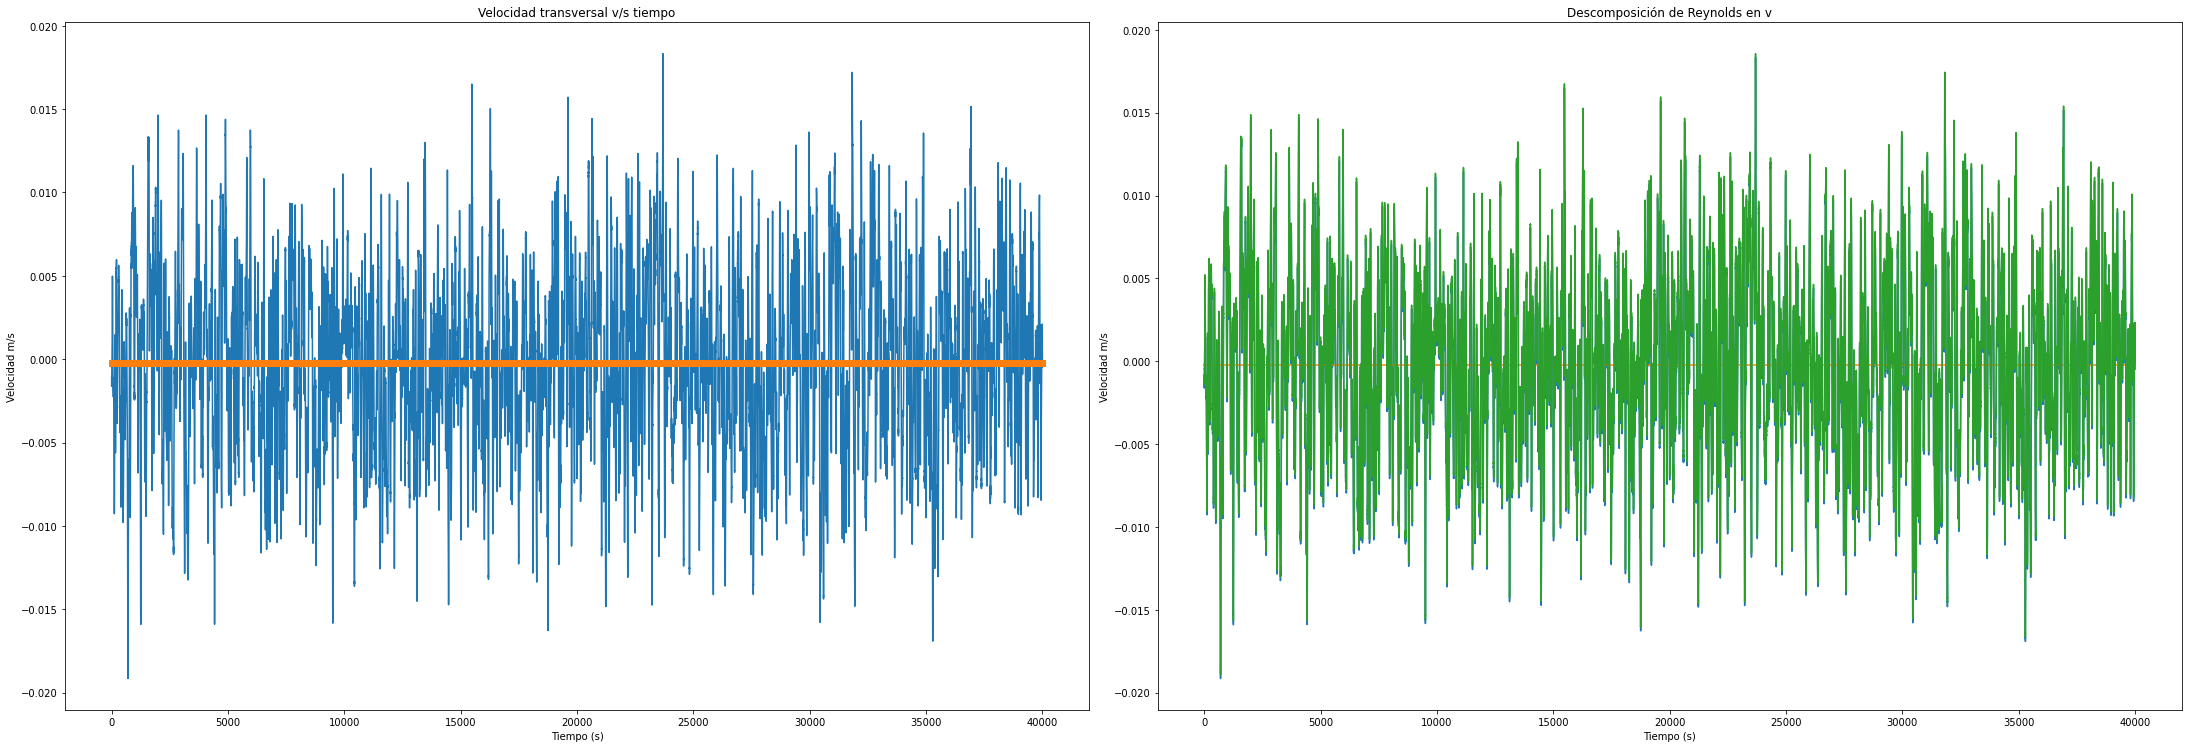

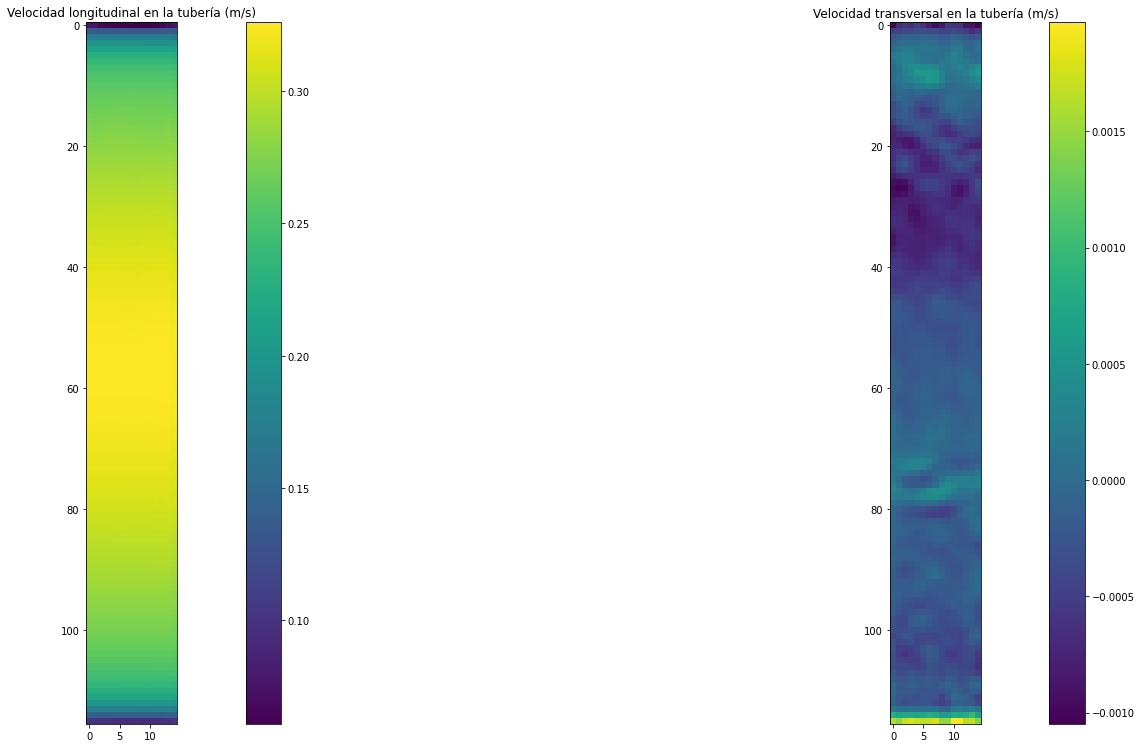

In [10]:
# Gráfico u(t) y mean(u) + u'
plt.subplot(1, 2, 1)
plt.plot(mean_u_t)
plt.plot([0,39999], [u_promedio, u_promedio], linewidth=7)
plt.xlabel("Tiempo (s)")
# plt.xticks(range(0, 39999, 5000), t)
plt.ylabel("Velocidad m/s")
plt.title("Velocidad longitudinal v/s tiempo")

plt.subplot(1, 2, 2)
plt.plot(list(u_prima + u_promedio))
plt.plot([0,39999], [u_promedio, u_promedio])
plt.plot(list(u_prima))
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad m/s")
plt.title("Descomposición de Reynolds en u")

plt.show()

# Gráfico v(t) y mean(v) + v'
plt.subplot(1, 2, 1)
plt.plot(mean_v_t)
plt.plot([0,39999], [v_promedio, v_promedio], linewidth=7)
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad m/s")
plt.title("Velocidad transversal v/s tiempo")

# Esto no me está funcionando
plt.subplot(1, 2, 2)
plt.plot(list(v_prima + v_promedio))
plt.plot([0,39999], [v_promedio, v_promedio])
plt.plot(list(v_prima))
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad m/s")
plt.title("Descomposición de Reynolds en v")

plt.show()

# Mapas de calor de la velocidad

plt.subplot(1, 2, 1)
plt.imshow(mean_u_xy)
plt.colorbar()
plt.title("Velocidad longitudinal en la tubería (m/s)")

plt.subplot(1, 2, 2)
plt.imshow(mean_v_xy)
plt.colorbar()
plt.title("Velocidad transversal en la tubería (m/s)")
plt.show()

Ahora que se calculó la velocidad longitudinal media, se puede calcular el número de Reynolds del flujo usando como longitud característica el diámetro de la tubería ($Re = \frac{UD}{\nu}$)

In [11]:
reynolds_number = (u_promedio * agua["diametro"] * agua["densidad"]) / agua["viscocidad dinámica"]
# reynolds_number = (0.279 * agua["diametro"] * agua["densidad"]) / agua["viscocidad dinámica"]
print(f"El número de Reynolds del flujo es {reynolds_number}")
# Da un npumero muy bajo para ser un flujo turbulento, cuando veamos el espectro de energía chequear este valor

El número de Reynolds del flujo es 5952.038824588182


$$Re = \frac{UD}{\nu} = 5904.917582281576$$

2.2) Calcular el campo de vorticidad medio. Recordar que $$\omega_{z} = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y} = \frac{\Delta v}{\Delta x} - \frac{\Delta u}{\Delta y}$$Es la única que debemos calcular porque el flujo es 2D

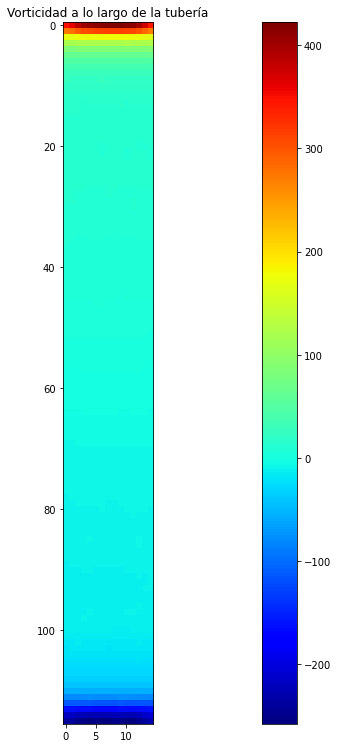

In [12]:
dvdx = list() # Velocidad longitudinal en función del largo

for i in range(116):
    dvdx.append(np.gradient(mean_v_xy[i], x[i])) # Variaciones de velocidad a lo largo del eje X
    # x[i] = dx

dudy = list()

for j in range(15):
    u_y = list()
    dy = list()
    for i in range(116):
        u_y.append(mean_u_xy[i][j])
        dy.append(y[i][j])

    dudy.append(np.gradient(u_y, dy))

dudy = np.transpose(dudy)


vorticidad = np.array(dvdx) - np.array(dudy)
# print(f"Derivada de V con respecto a X: {dvdx}\n")
# print(f"Derivada de U con respecto a Y: {dudy}\n")

# print(f"Shape dudy = {np.shape(dudy)}")
# print(f"Shape dvdx = {np.shape(dvdx)}")

# Gráfico del campo de vorticidad
plt.imshow(vorticidad, cmap='jet')
plt.colorbar()
plt.title("Vorticidad a lo largo de la tubería")
plt.show()

3) Tensiones de corte en la pared

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


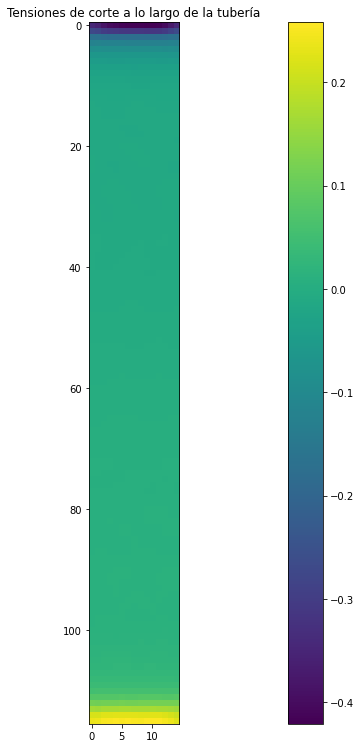

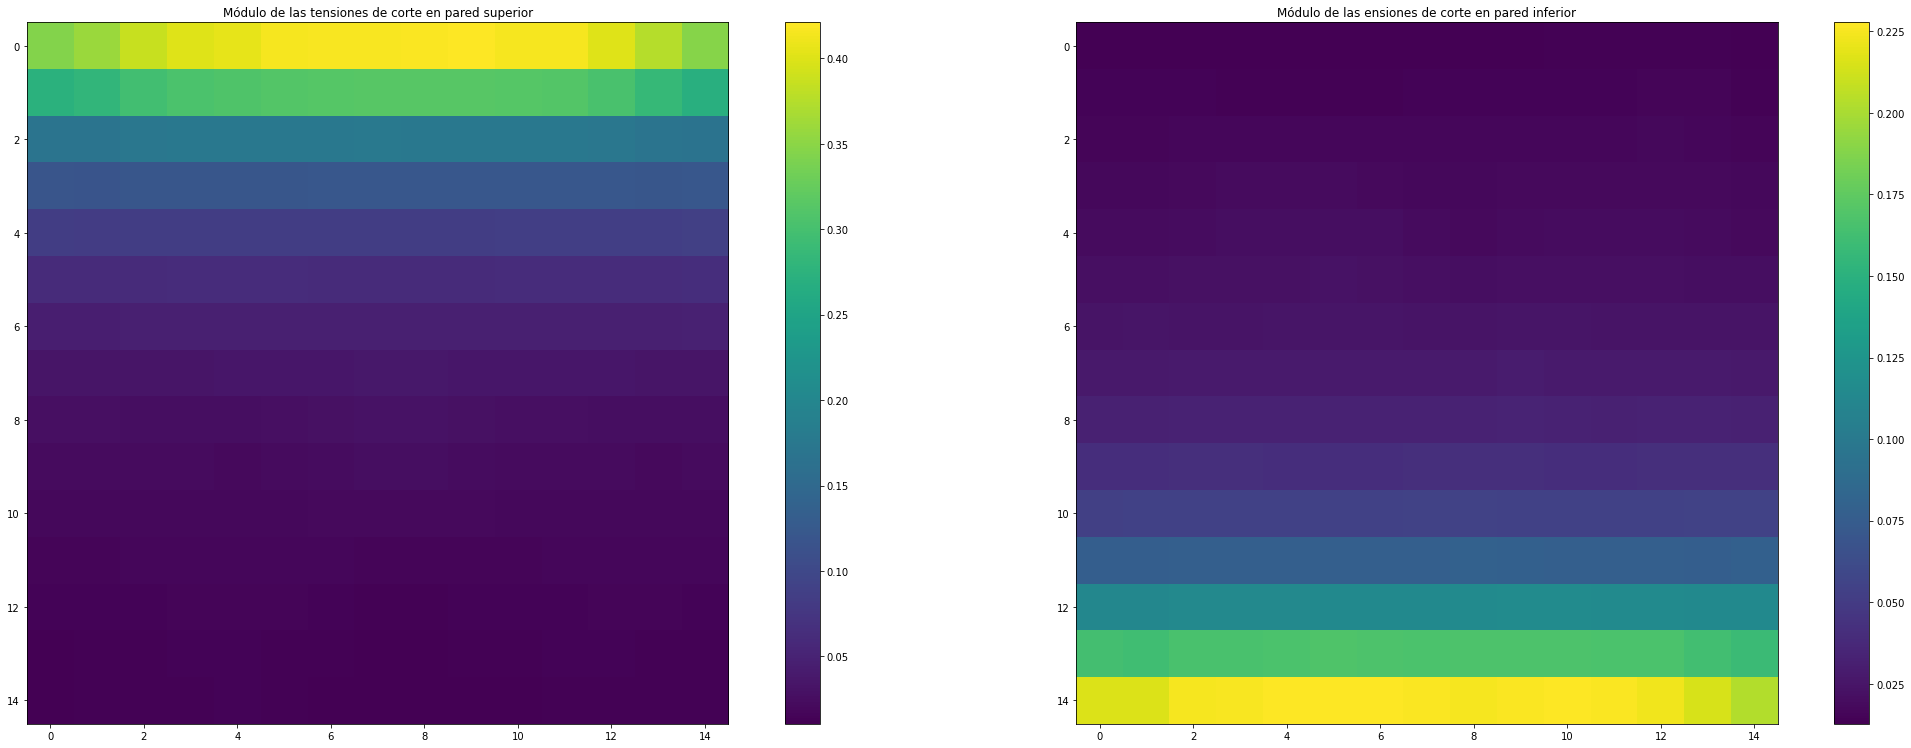

In [31]:
tau_xy = agua["viscocidad dinámica"] * (dvdx + dudy)
plt.imshow(tau_xy)
plt.colorbar()
plt.title("Tensiones de corte a lo largo de la tubería")
plt.show()

plt.subplot(1, 2, 1)
plt.imshow(np.abs(tau_xy[0:15]))
plt.colorbar()
plt.title("Módulo de las tensiones de corte en pared superior")

plt.subplot(1, 2, 2)
plt.imshow(np.abs(tau_xy[100:115]))
plt.colorbar()
plt.title("Módulo de las ensiones de corte en pared inferior")
plt.show()

4) Componentes del tensor de tensiones de Reynolds. Al calcular la correlación y agregar "full" se calcula la correlación entre todas las "diferencias de tiempo" posibles. Sólo hay que saber interpretar este resultado.

Tensión xy: 9.095288091032696e-17
Tensión xx: 1.409769654110068e-15
Tensión yy: -7.730994877377792e-16
El tensor de Reynolds es [[[ 0.03437028  0.07398772  0.11116107 ...  0.11116107  0.07398772
    0.03437028]
  [ 0.00151936  0.00109148 -0.002771   ...  0.01850116  0.01105663
    0.00475428]]

 [[ 0.00151936  0.00109148 -0.002771   ...  0.01850116  0.01105663
    0.00475428]
  [ 0.00021017  0.00018733 -0.0002973  ... -0.0002973   0.00018733
    0.00021017]]]
Largo de la tensión de reynolds xx: 79997
Largo de las descomposiciones de reynolds: 39999 y 39999


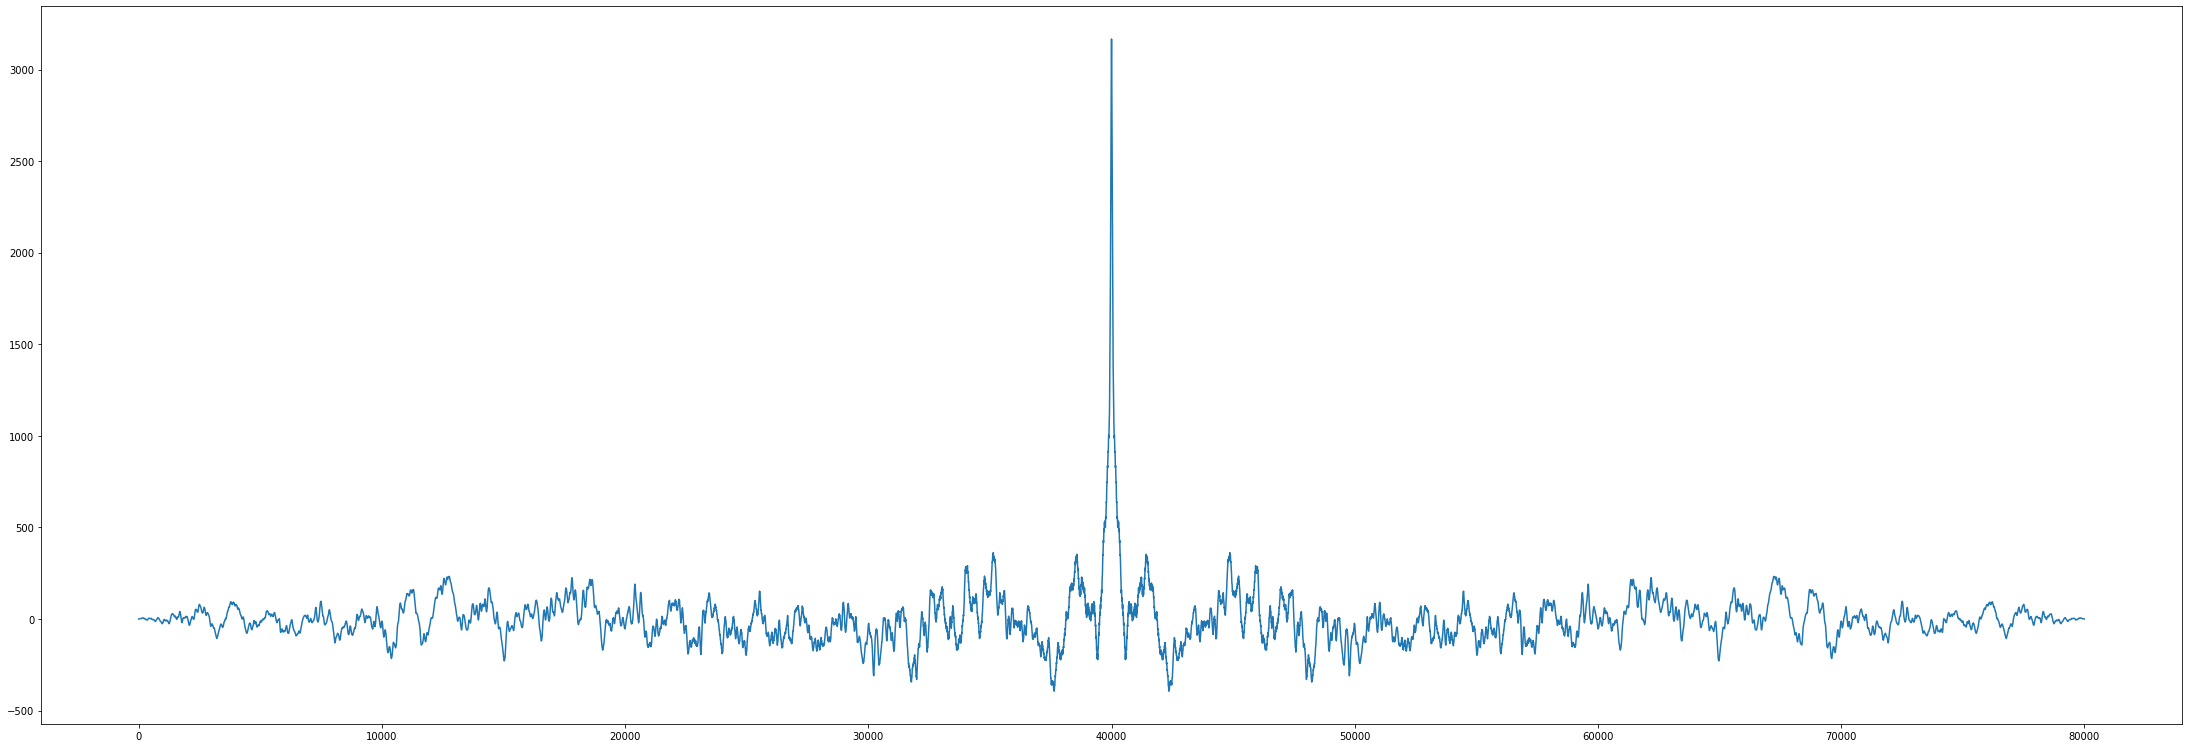

Largo de la tensión de reynolds xx: 79997


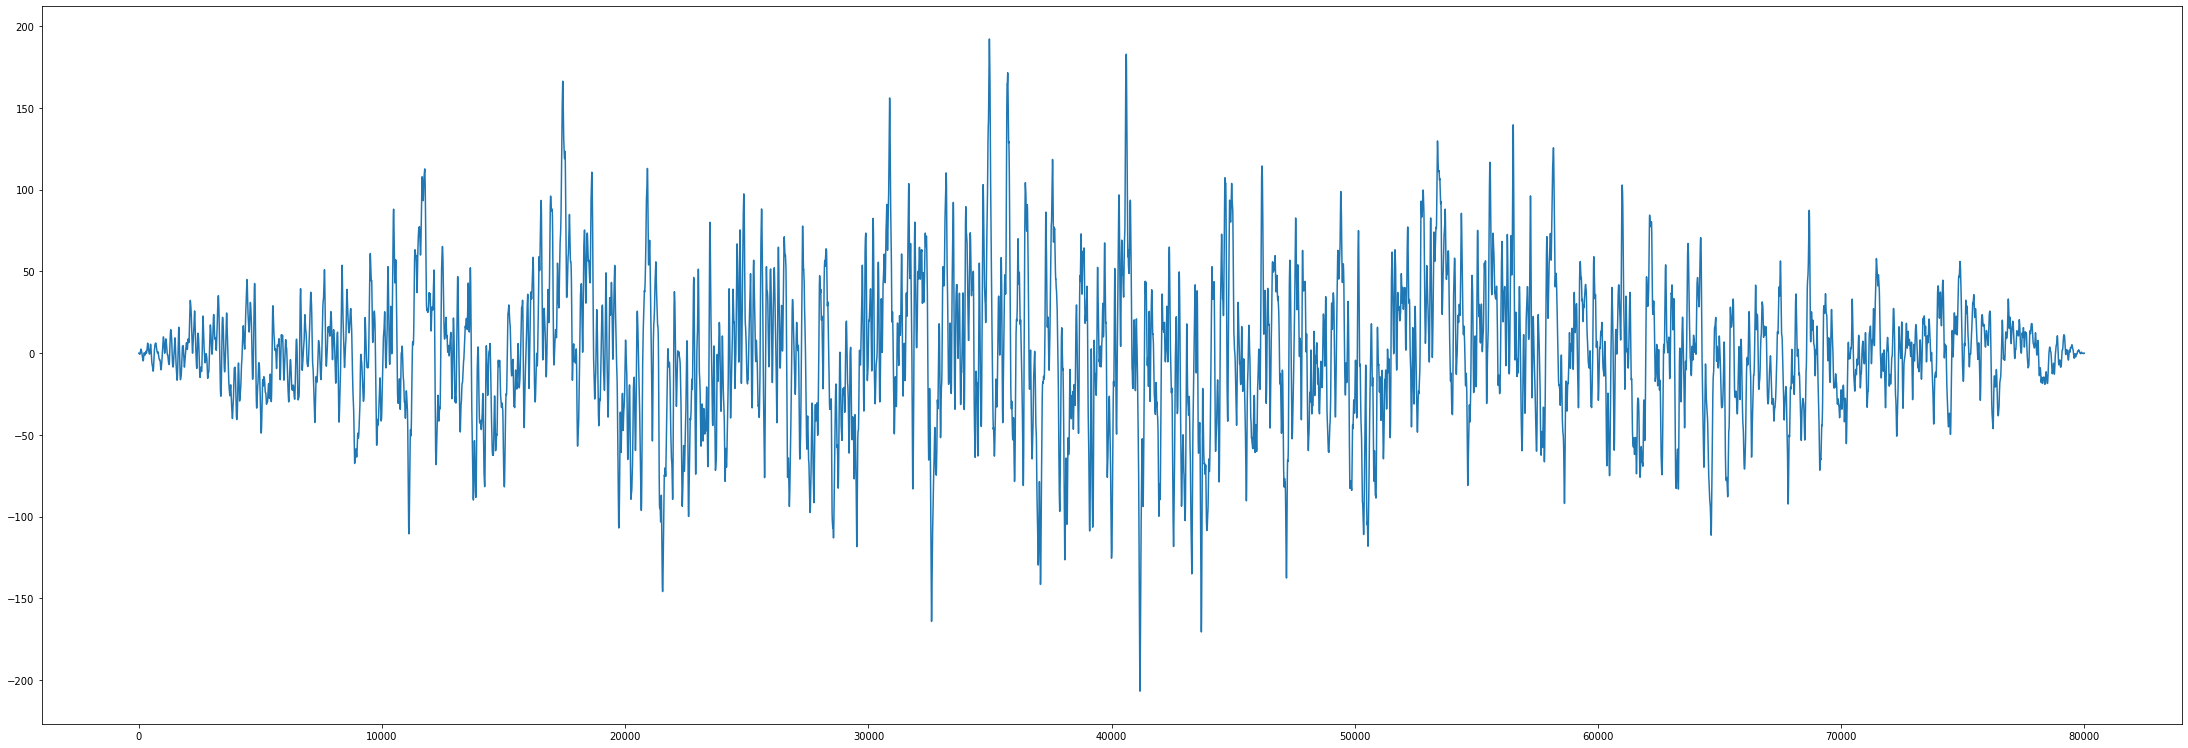

Largo de la tensión de reynolds yy: 79997


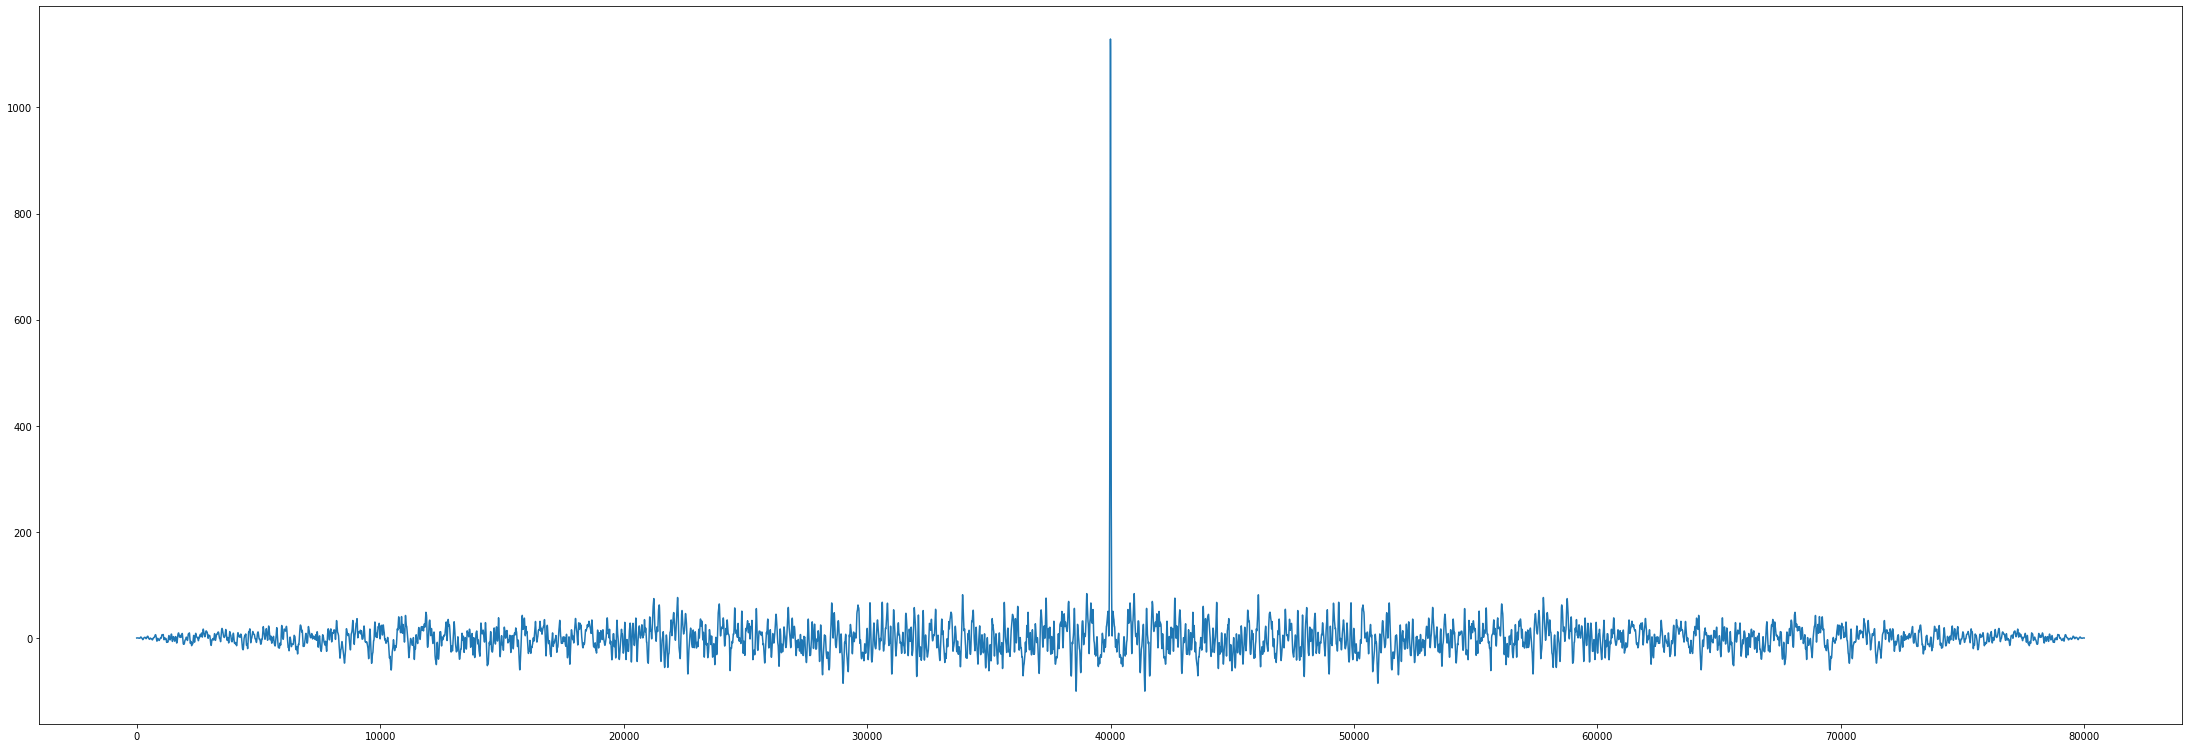

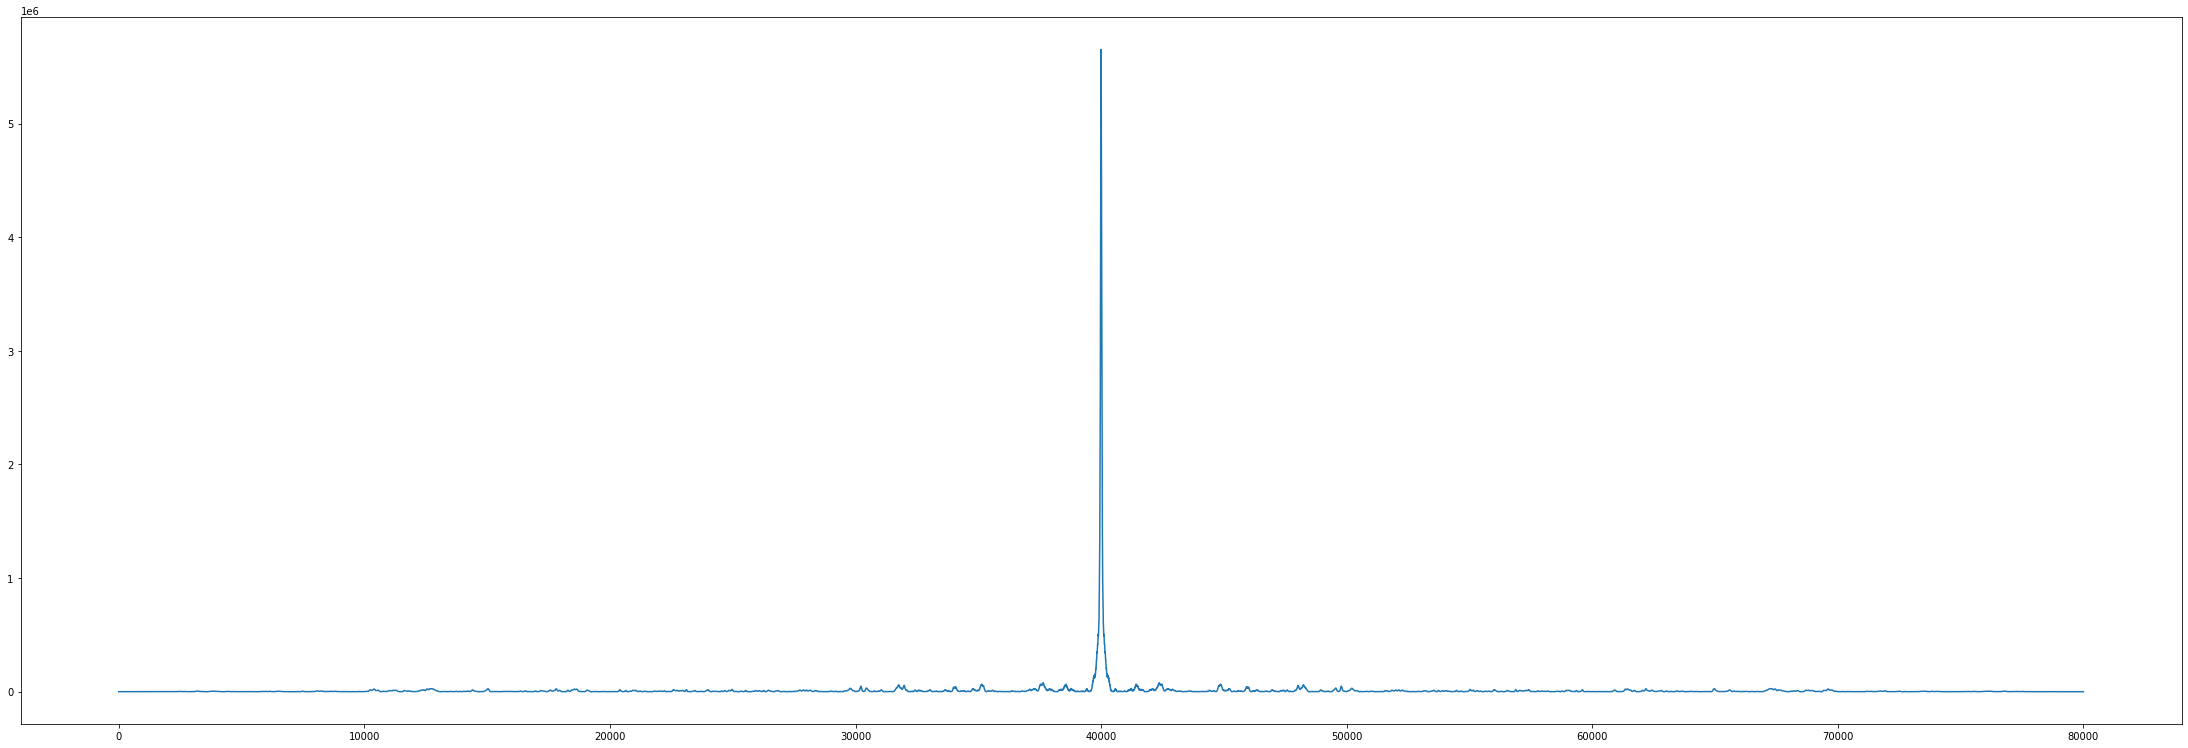

In [14]:
reynolds_xx = np.correlate(u_prima, u_prima, "full") * agua["densidad"]
reynolds_xy = np.correlate(u_prima, v_prima, "full") * agua["densidad"]
reynolds_yy = np.correlate(v_prima, v_prima, "full") * agua["densidad"]

print(f"Tensión xy: {np.mean(reynolds_xy)}")
print(f"Tensión xx: {np.mean(reynolds_xx)}")
print(f"Tensión yy: {np.mean(reynolds_yy)}")

tensor_reynolds = np.array([[reynolds_xx, reynolds_xy],
                            [reynolds_xy, reynolds_yy]])

print(f"El tensor de Reynolds es {tensor_reynolds}")

plt.plot(reynolds_xx)
print(f"Largo de la tensión de reynolds xx: {len(reynolds_xx)}")
print(f"Largo de las descomposiciones de reynolds: {len(u_prima)} y {len(v_prima)}")
plt.show()

plt.plot(reynolds_xy)
print(f"Largo de la tensión de reynolds xx: {len(reynolds_xy)}")
plt.show()

plt.plot(reynolds_yy)
print(f"Largo de la tensión de reynolds yy: {len(reynolds_yy)}")
plt.show()

TKE = 0.5 * (reynolds_yy**2 + reynolds_xx ** 2)
plt.plot(TKE)
plt.show()

$$
\tau_{ij} = \begin{bmatrix}
    \tau_{xx} & \tau_{xy} \\
    \tau_{yx} & \tau_{yy}
   \end{bmatrix}
 =  \begin{bmatrix}
    0 & 0 \\
    0 & 0
   \end{bmatrix}
$$

Vamos a graficar la velocidad en un cierto punto y su descomposición de Reynolds

6) Calcular el espectro de energía en la zona cercana a la pared, al centro de la tubería y
en una posición entre las dos anteriores. Comente a que se deben la diferencias.
Justifique sus comentarios basados en antecedentes bibliográficos.



https://www.youtube.com/watch?v=s2K1JfNR7Sc Maestro me salvaste

[10.59660973 11.28975691 11.69522202 ... 20.49989727 20.49994727
 20.49999728]
[ -0.73432831  -0.47595173  -1.20763156 ... -15.77791841 -16.14111986
 -14.82274258]


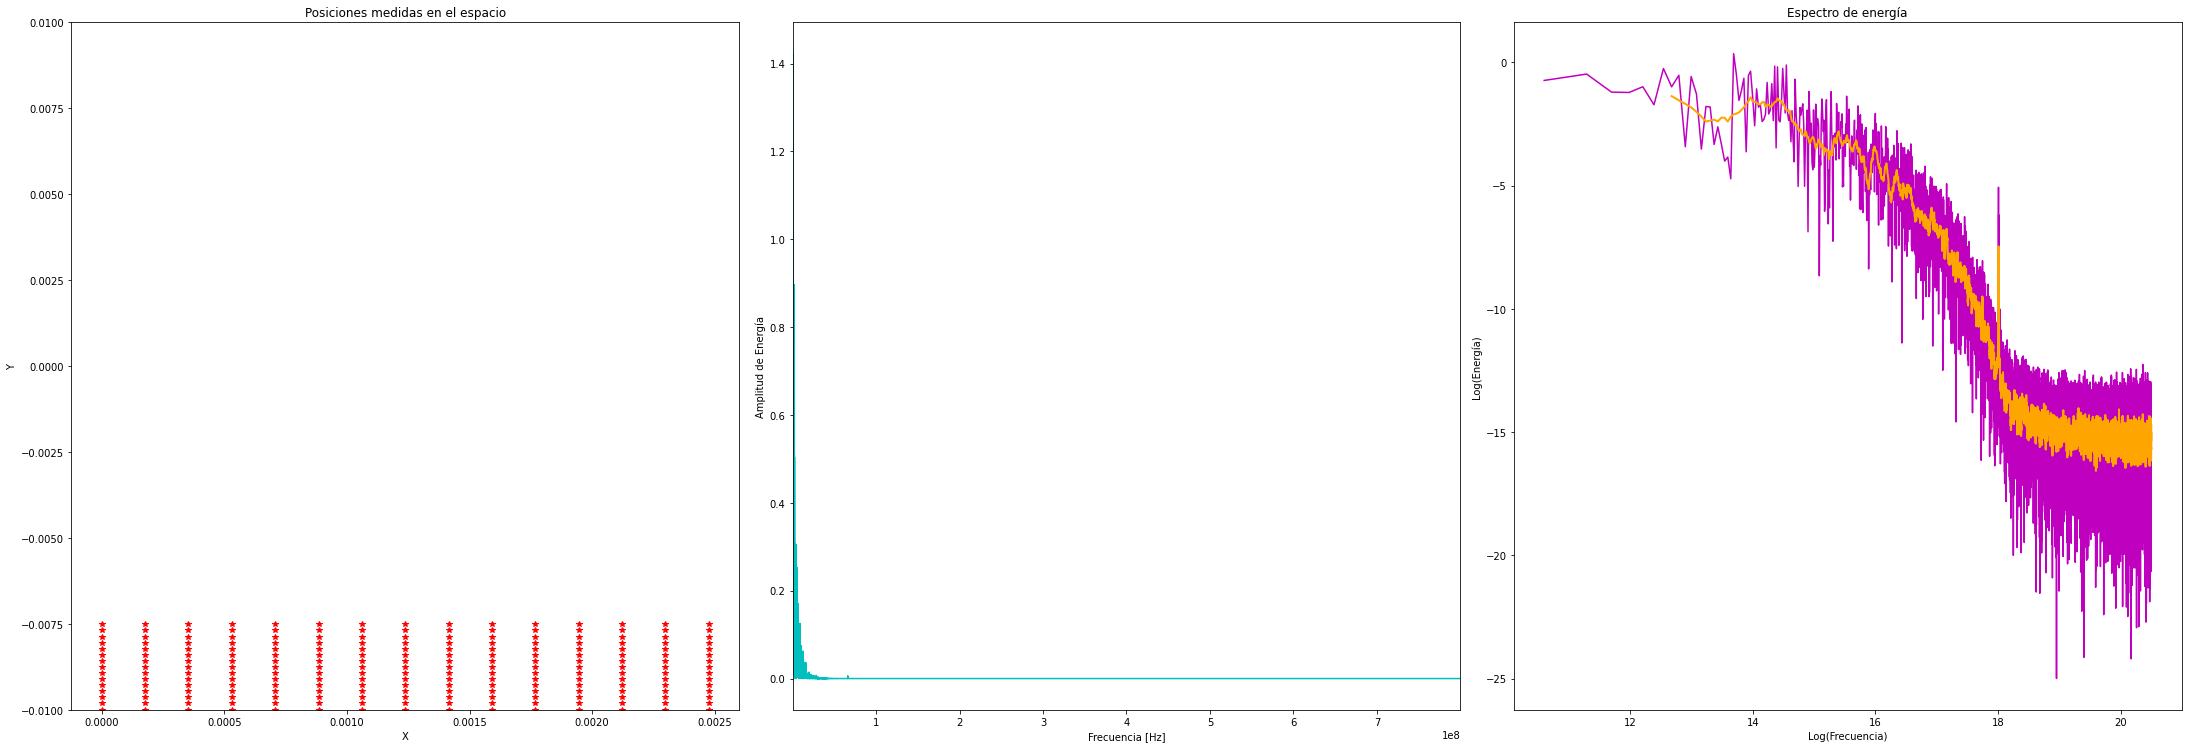

Amplitud: (0.47982764524641724+0j), Frecuencia: 39999.0


In [59]:
def fourier_transform(zone):
    # upper y lower me definirán las zonas donde tenemos que estar

    if zone == "pared inferior":
        upper = 115
        lower = 115 - 15
    elif zone == "pared superior":
        upper = 15
        lower = 0
    elif zone == "medio":
        upper = 70
        lower = 50

    # Tenemos que crear submatrices de las matrices x e y
    sub_y = y[lower:upper]
    sub_x = x[lower:upper]
    sub_u = u[lower:upper]
    sub_v = u[lower:upper]

    # Gráfico de la zona en la que estamos calculando el espectro de energía
    
    sub_u_t = np.mean(sub_u, axis=(0,1))
    sub_v_t = np.mean(sub_v, axis=(0,1))
    vel = np.linalg.norm([sub_u_t, sub_v_t], axis=0)

    # Ahora hay que calcular la transformada de Fourier

    f = vel
    n = len(vel)
    dt = 1/39999
    fhat = np.fft.fft(f, n)
    psd = fhat * np.conj(fhat) / n # Amplitud
    freq = (1/dt) * np.arange(n) # Frecuencia
    L = np.arange(1, np.floor(n/2), dtype="int")

    # Graficar la transformada de Fourier y la zona en la cual la estamos calculando

    fig, ax = plt.subplots(1, 3)

    ax[0].plot(sub_x, sub_y,'r*')
    ax[0].set_title("Posiciones medidas en el espacio")
    ax[0].set_xlabel("X")
    ax[0].set_ylabel("Y")
    ax[0].set_ylim(-0.01, 0.01)

    ax[1].plot(freq[L], psd[L], color="c")
    ax[1].set_xlabel("Frecuencia [Hz]")
    ax[1].set_ylabel("Amplitud de Energía")
    ax[1].set_xlim(freq[L[0]], freq[L[-1]])

    # Ahora a graficar los logaritmos de estos datos
    filt = np.ones(15)/15
    smooth_log_psd = np.convolve(np.log(psd[L]), filt, mode="valid")

    ax[2].plot(np.log(freq[L]), np.log(psd[L]), color="m")
    ax[2].plot(np.log(freq[L])[7:-7], smooth_log_psd, color="orange", linewidth=2)
    ax[2].set_xlabel("Log(Frecuencia)")
    ax[2].set_ylabel("Log(Energía)")
    ax[2].set_title("Espectro de energía")

    print(np.log(freq[L]))
    print(np.log(psd[L].real))

    plt.show()

    print(f"Amplitud: {psd[1]}, Frecuencia: {freq[1]}")

fourier_transform("pared inferior")

[10.59660973 11.28975691 11.69522202 ... 20.49989727 20.49994727
 20.49999728]
[ -1.51428316  -0.52793077  -1.14276311 ... -12.19552756 -12.38244207
 -11.82611727]


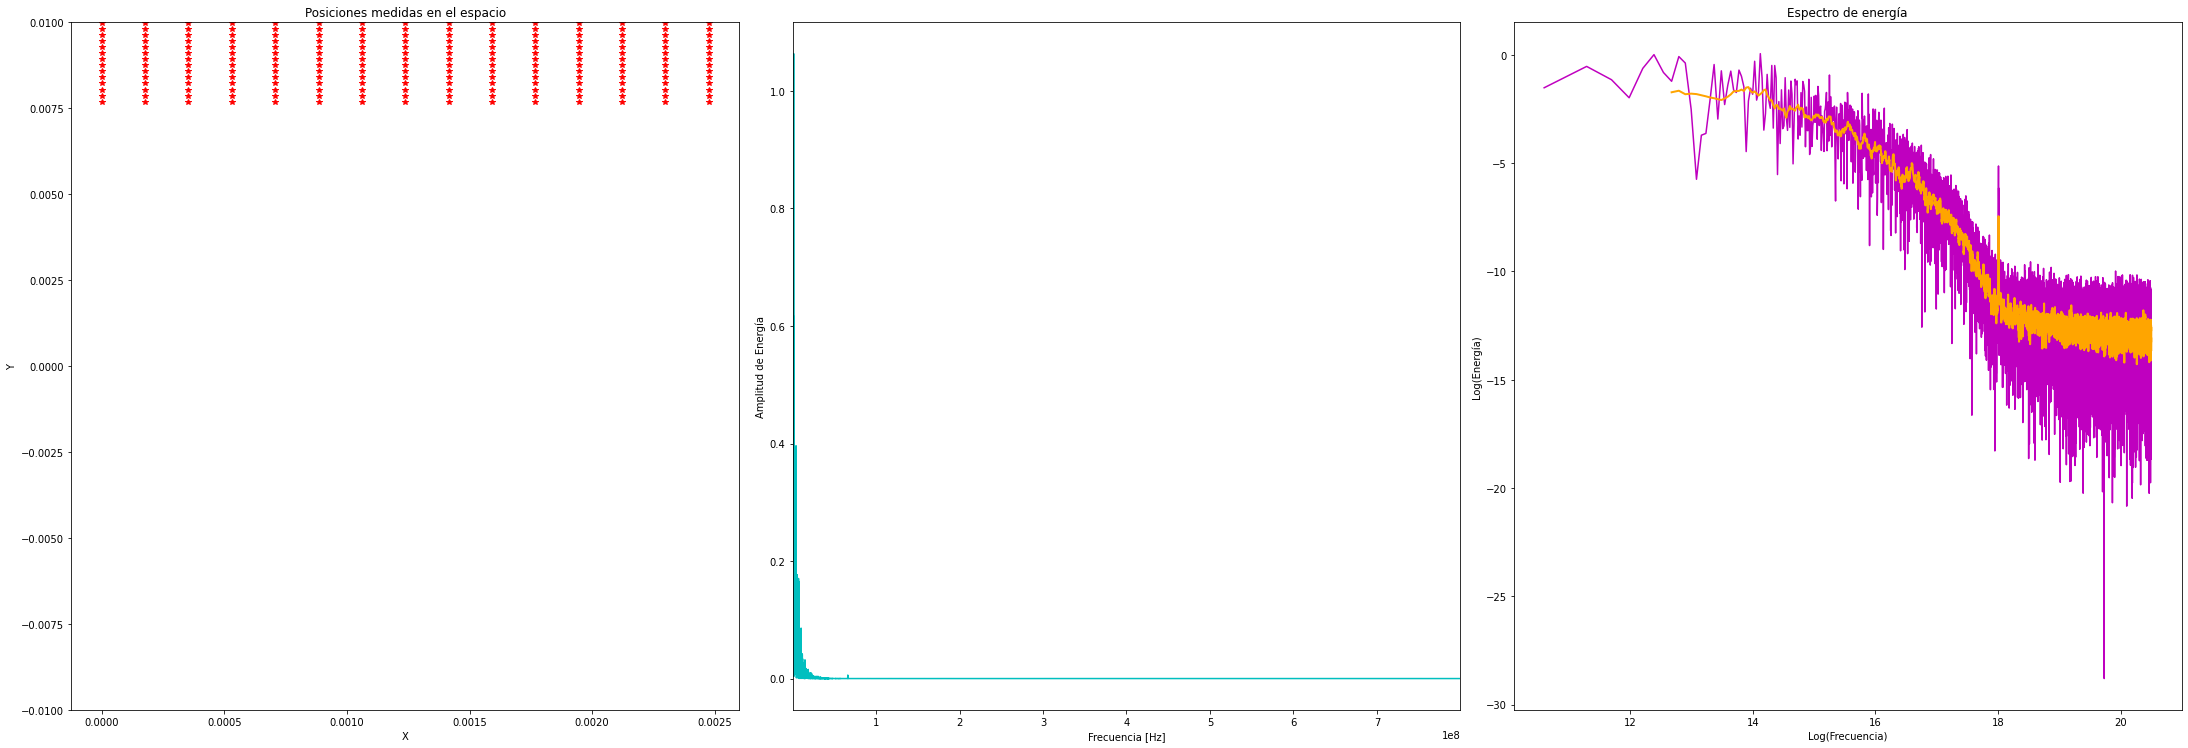

Amplitud: (0.21996580936093313+0j), Frecuencia: 39999.0


In [60]:
fourier_transform("pared superior")

[10.59660973 11.28975691 11.69522202 ... 20.49989727 20.49994727
 20.49999728]
[ -4.34308438  -4.31144509  -5.37007564 ... -14.41842941 -15.49181224
 -14.44575177]


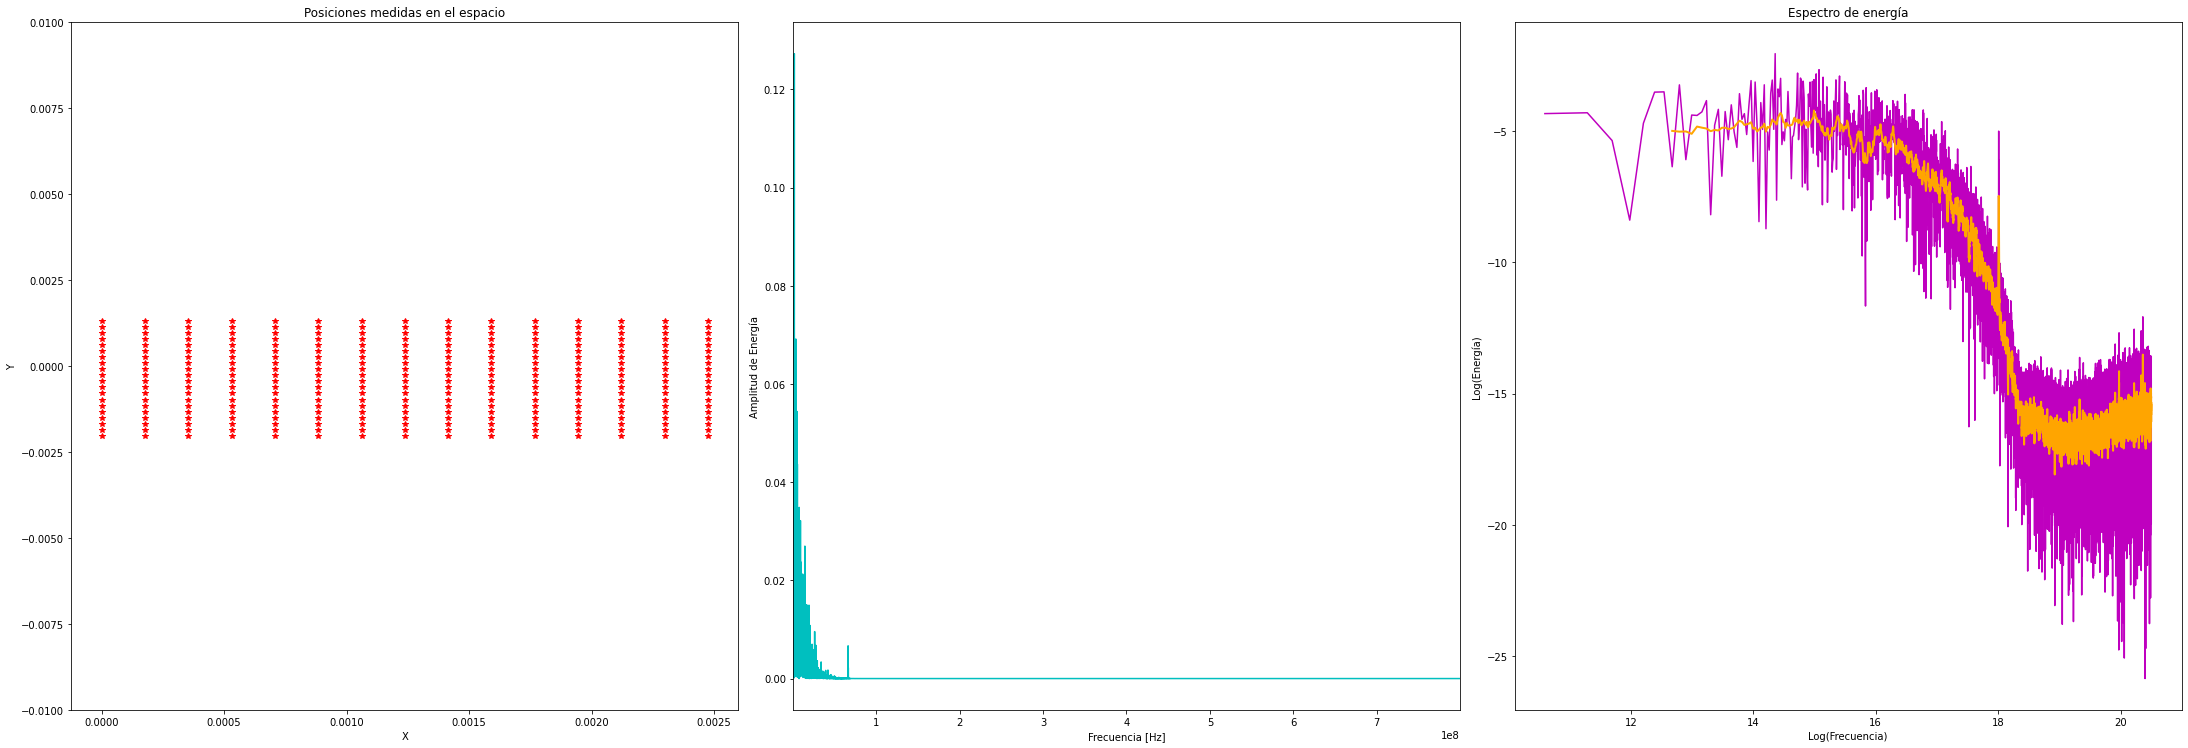

Amplitud: (0.012996380566765416+0j), Frecuencia: 39999.0


In [61]:
fourier_transform("medio")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


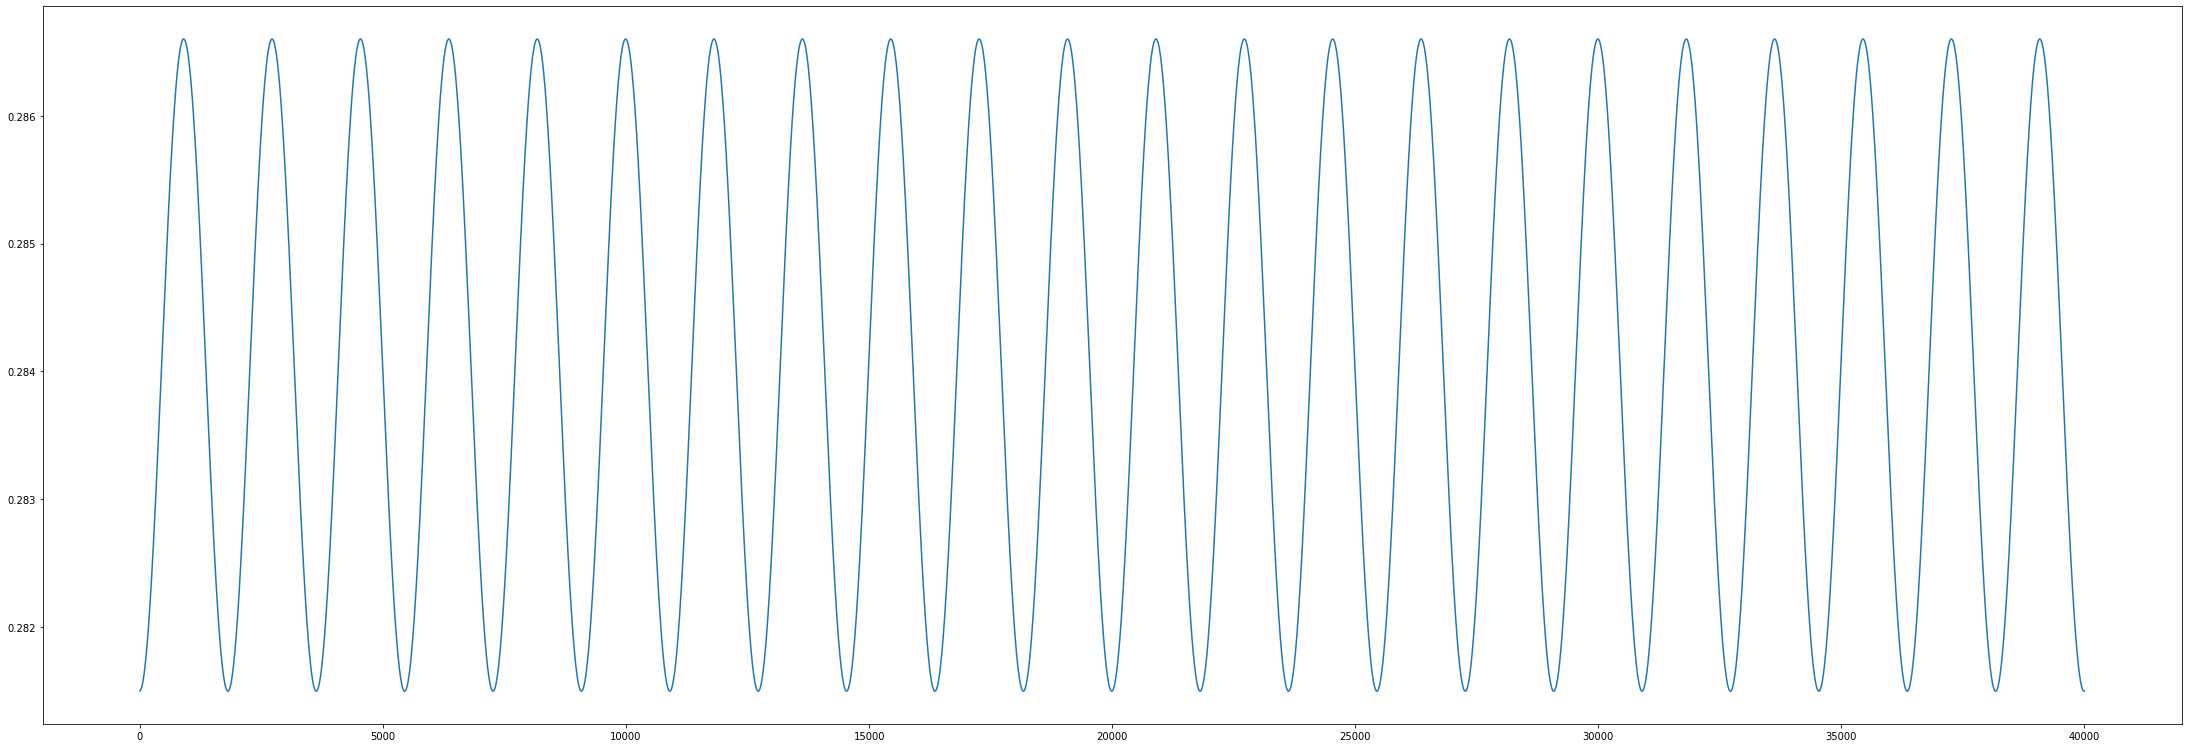

In [30]:
# Filtrar las velocidades (no se de que sirva pero lo hacen en la ayudantía)
# indices = psd > 0.05
# fhat = indices * fhat
# vel_filtrada = np.fft.ifft(fhat)
# plt.plot(vel_filtrada)
# plt.show()

7) En base a las características de las mediciones que se le entregaron (duración y
frecuencia de adquisición), comente que confiabilidad tienen los espectros calculados
anteriormente y por qué



8) Realice cualquier análisis adicional que permita comprender más las características
del flujo. Este análisis es su contribución al trabajo y puede ser basados en
antecedentes o ejemplos recopilados de la literatura.